## Stroke Disease Classification

#### About Dataset

According to the World Health Organization (WHO) stroke is the 2nd
leading cause of death globally, responsible for approximately 11% of
total deaths. This dataset is used to predict whether a patient is likely
to get a stroke based on the input parameters like gender, age, various
diseases, and smoking status.

In this machine learning project, the overall topic that will be resolved is in the field of stroke health, where it will try to predict the possibility of a stroke in a person with certain conditions based on several factors including: age, certain diseases (hypertension, heart disease), smoking, etc.

#### Background

Stroke is a condition that occurs when the blood supply to the brain is interrupted or reduced due to a blockage (ischemic stroke) or rupture of a blood vessel (hemorrhagic stroke). Without blood, the brain will not get oxygen and nutrients, so cells in some areas of the brain will die. This condition causes parts of the body controlled by the damaged area of the brain to not function properly.

Stroke is an emergency condition that needs to be treated as soon as possible, because brain cells can die in just a matter of minutes. Prompt and appropriate treatment measures can minimize the level of brain damage and prevent possible complications.

In this machine learning project, the overall topic that will be resolved is in the health sector regarding stroke, where it will try to predict the possibility of a stroke in a person with certain conditions based on several factors including: age, certain diseases (hypertension, heart disease) who are at high risk of developing stroke. strokes, cigarettes, etc.

As previously explained, stroke can kill the sufferer in a matter of minutes. Detecting stroke with the existing causative factors with the help of machine learning can be very useful in the world of health to detect stroke early in order to increase the sense of heart among sufferers so that strokes can be prevented early.

##### Business Understanding

To solve the problem of predicting stroke in a person, machine learning can be done that helps detect the possibility of stroke from the existing signs.

Problems to solve: Detection (Prediction) of the possibility of a stroke in a person

The purpose of making Machine Learning Model: The model can classify more than 90% of cases with certain conditions

Solution: Making Machine Learning with the KNearestNeighbors Algorithm that can classify someone who has the potential to have a stroke

###### Data Understanding


Target: stroke : Prediction target if the patient has a stroke then 1, otherwise 0 [int]

In the project, it can be seen from the number of targets, the number of patients who had a stroke was very small compared to patients who did not have a stroke. And with the heatmap it can be seen that gender does not affect a person can have a stroke or not.

### 1. Install and import required library

In [1]:
# library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for data processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# library for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold

# library for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

### 2. Data Understanding
2.1 Read data with pandas

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Downloads\ML Project\Stroke Prediction\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Explore Dataset information

In [70]:
# check dataset info
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# check dataset shape
df.shape

(5110, 12)

In [5]:
# check missing value of the data
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# describe numeric column
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Data Preparation
Handling missing values with mean subtitution

In [194]:
# recheck missing value
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [195]:
f"Percentage of null in BMI is {df['bmi'].isna().sum() / len(df) * 100}%"

'Percentage of null in BMI is 3.9334637964774952%'

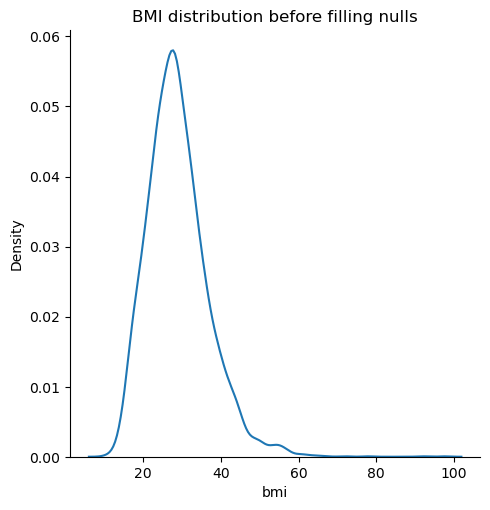

In [200]:
sns.displot(df['bmi'], kind='kde')
plt.title('BMI distribution before filling nulls');

In [201]:
# Replace null in BMI with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [202]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

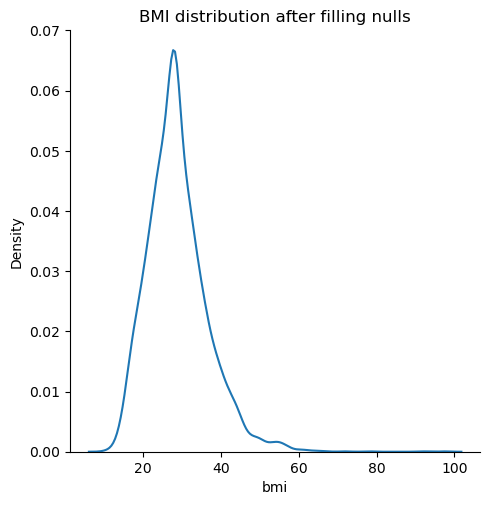

In [203]:
sns.displot(df['bmi'], kind='kde')
plt.title('BMI distribution after filling nulls');

In [74]:
# check duplicated data
duplicate = df.duplicated()
df[duplicate].sum()

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

#### Remove unnecessary column

In [109]:
df.drop(columns=['id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### EDA

In [111]:
def piedist(data, column, labels):
    """
    Plots the distribution percentage of a categorical column
    in a pie chart.
    """
    dist = data[column].value_counts()
    colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99', '#be99ff']
    plt.pie(x=dist, labels=labels, autopct='%1.2f%%', pctdistance=0.5, colors=colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

##### BMI

How does BMI relate to stroke?

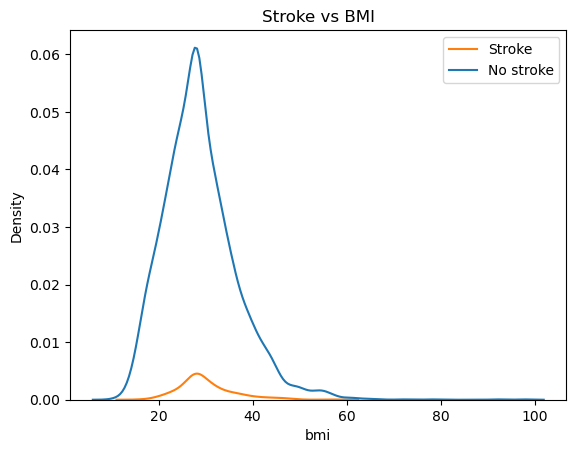

In [112]:
sns.kdeplot(data=df, x='bmi', hue='stroke')
plt.title('Stroke vs BMI')
plt.legend(['Stroke', 'No stroke'])
plt.show()

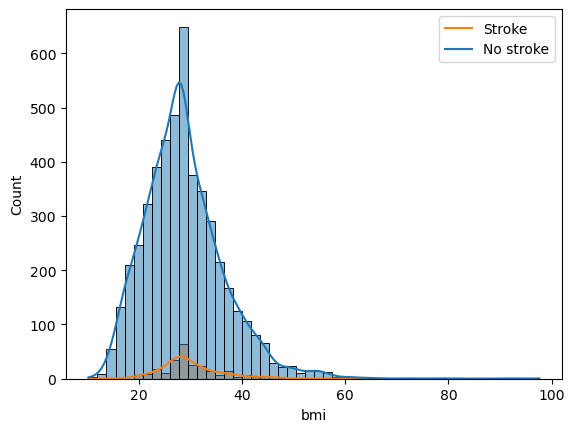

In [114]:
sns.histplot(x='bmi', data=df, kde=True, hue='stroke',bins=50)
plt.legend(['Stroke', 'No stroke'])
plt.show()

BMI doesn't have a serious effect on the stroke.

##### Gender

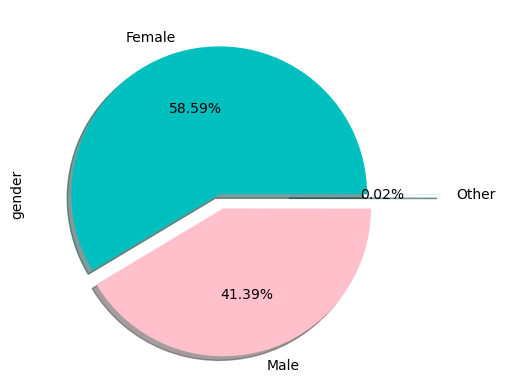

In [115]:
df['gender'].value_counts().plot(kind='pie',explode=[0,0.1,0.5],autopct='%0.2f%%',colors=['c','pink'],shadow=True)
plt.show()

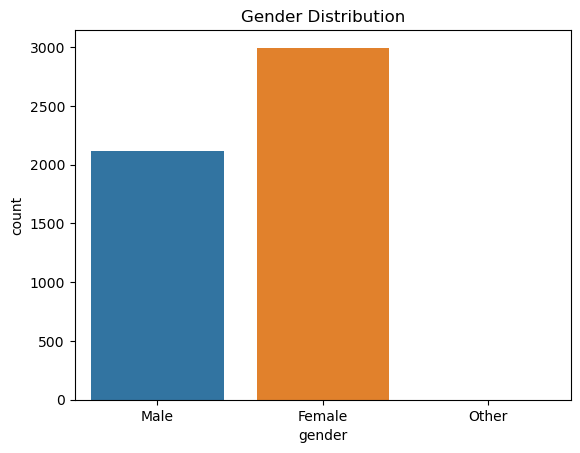

In [116]:
plt.title('Gender Distribution')
sns.countplot(x=df['gender']);

In [95]:
# Number of people with gender of "Other"
(df['gender'] == 'Other').sum()

1

In [96]:
# There's only one person with a gender of other, we can drop it
df.drop(df[df['gender'] == 'Other'].index, axis=0, inplace=True)

##### How does gender relate to stroke?

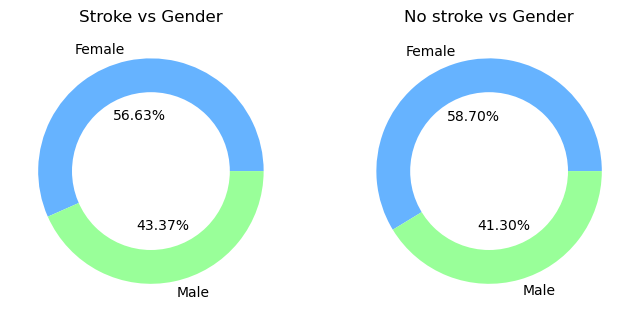

In [97]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Gender')
piedist(data=df[df['stroke'] == 1], column='gender', labels=['Female', 'Male'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Gender')
piedist(data=df[df['stroke'] == 0], column='gender', labels=['Female', 'Male'])

#### HeatMap

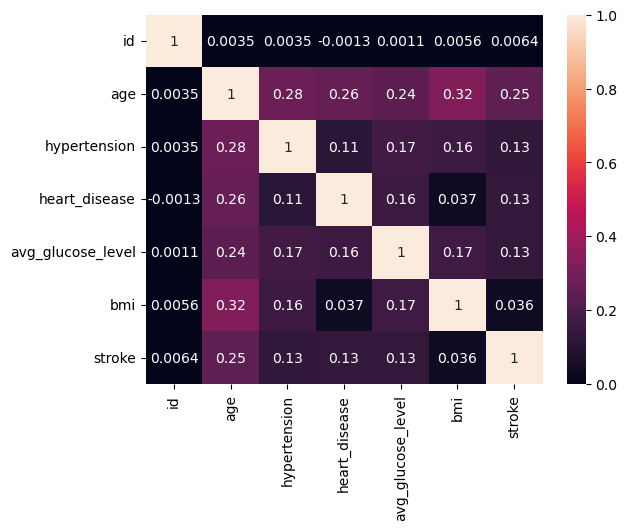

In [253]:
sns.heatmap(df.corr(),annot=True)#its gives the realation between two variables
plt.show()

#### Age

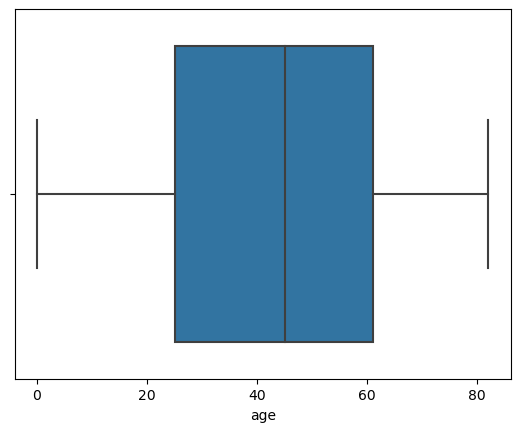

In [99]:
sns.boxplot(x=df['age'])
plt.show()

Age doesn't include any outliers.

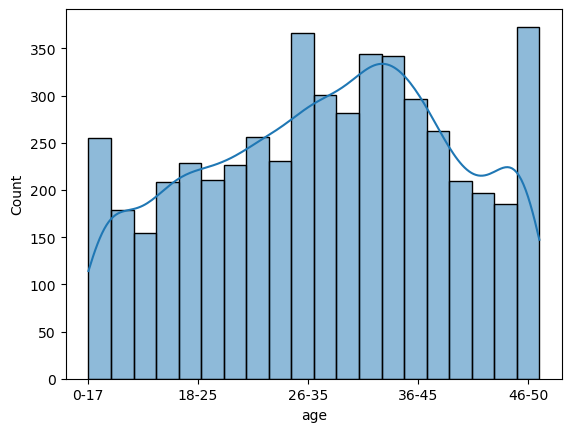

In [102]:
sns.histplot(df["age"], kde=True).set_xticklabels([ '0', '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.show()

#### How does age relate to stroke?

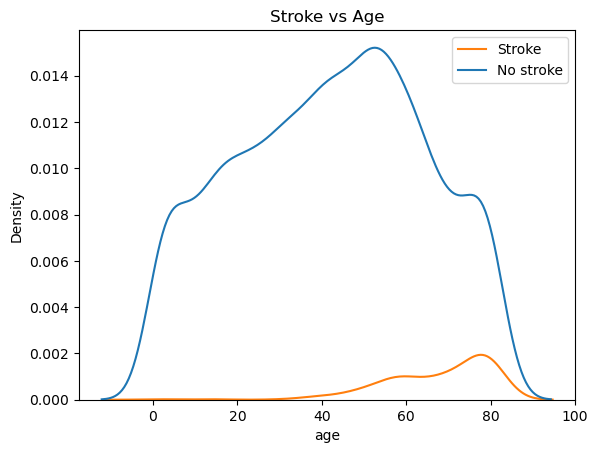

In [103]:
sns.kdeplot(data=df, x='age', hue='stroke')
plt.title('Stroke vs Age')
plt.legend(['Stroke', 'No stroke'])
plt.show()

 People with age > 40 tend to have stroke more than younger people.

#### Hypertension


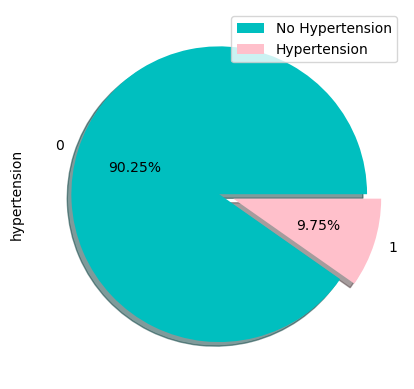

In [132]:
df['hypertension'].value_counts().plot(kind='pie',explode=[0,0.1],autopct='%0.2f%%',colors=['c','pink'],shadow=True)
plt.legend(['No Hypertension','Hypertension'])
plt.show()

How does hypertension relate to stroke?

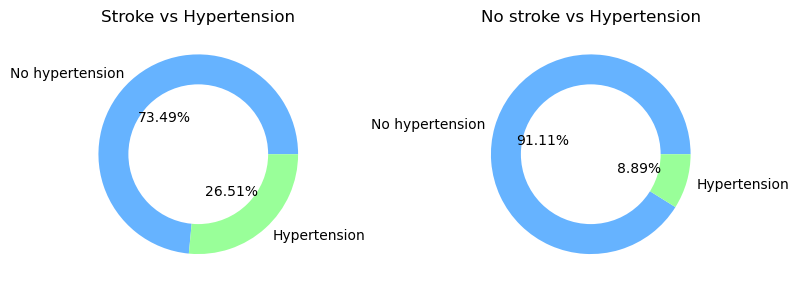

In [104]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Hypertension')
piedist(data=df[df['stroke'] == 1], column='hypertension', labels=['No hypertension', 'Hypertension'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Hypertension')
piedist(data=df[df['stroke'] == 0], column='hypertension', labels=['No hypertension', 'Hypertension'])

plt.tight_layout()

#### Hypertension


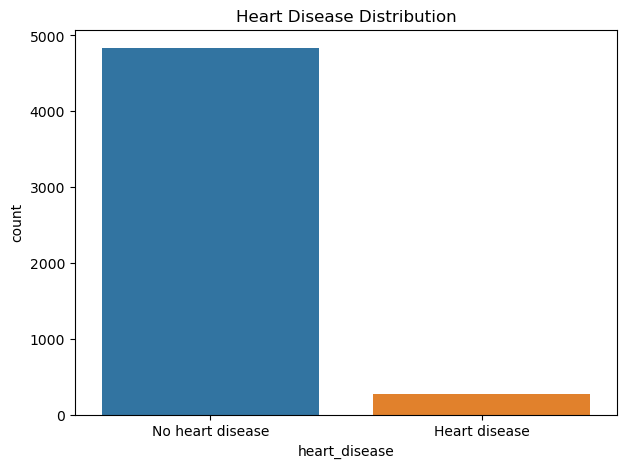

In [129]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.title('Heart Disease Distribution')
sns.countplot(x=df['heart_disease'])
ax.set_xticklabels(['No heart disease', 'Heart disease']);

How does having a heart disease relate to stroke?

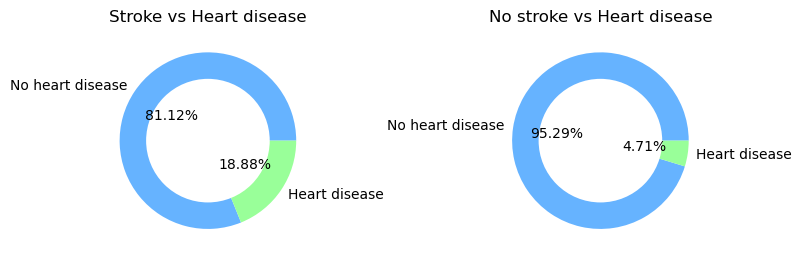

In [130]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Heart disease')
piedist(data=df[df['stroke'] == 1], column='heart_disease', labels=['No heart disease', 'Heart disease'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Heart disease')
piedist(data=df[df['stroke'] == 0], column='heart_disease', labels=['No heart disease', 'Heart disease'])

plt.tight_layout()

###### Ever Married

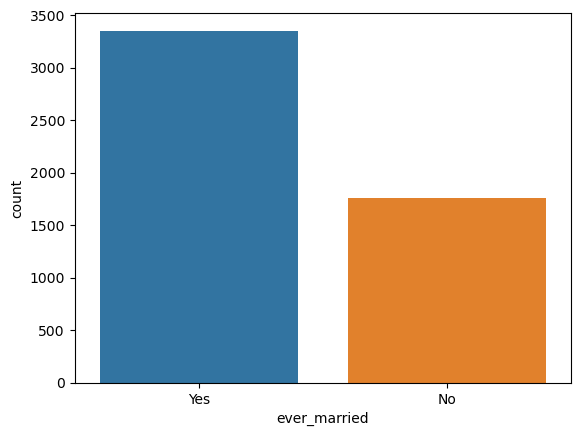

In [134]:
sns.countplot(x=df['ever_married'])
plt.show()

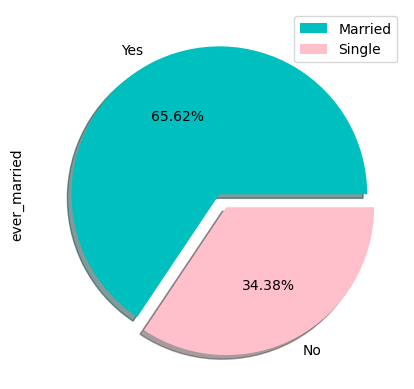

In [148]:
df['ever_married'].value_counts().plot(kind='pie',explode=[0,0.1],autopct='%0.2f%%',colors=['c','pink'],shadow=True)
plt.legend(['Married','Single'])
plt.show()

Most people in the dataset have married before.

###### How does ever marrying relate to stroke?

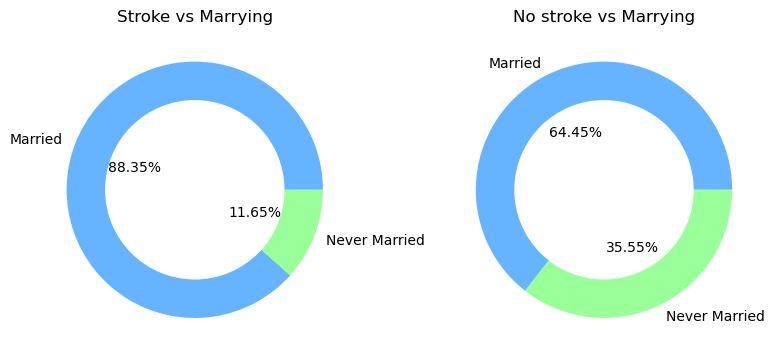

In [149]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Marrying')
piedist(data=df[df['stroke'] == 1], column='ever_married', labels=['Married', 'Never Married'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Marrying')
piedist(data=df[df['stroke'] == 0], column='ever_married', labels=['Married', 'Never Married'])

plt.tight_layout()

The majority of people (88.35%) with stroke are married.

##### Work Type

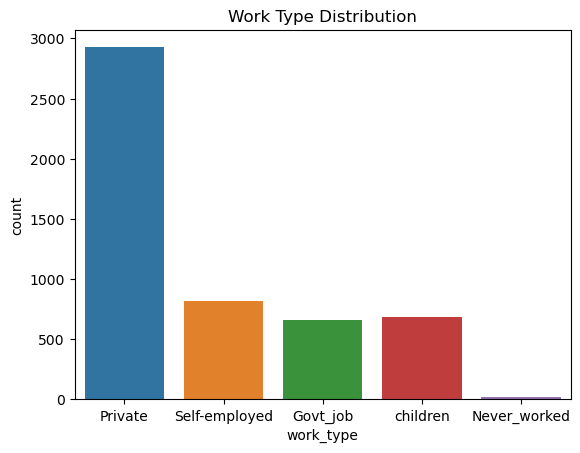

In [151]:
plt.title('Work Type Distribution')
sns.countplot(data=df, x='work_type');

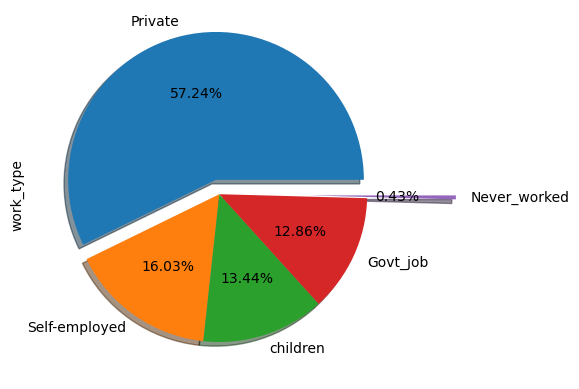

In [160]:
df['work_type'].value_counts().plot(kind='pie',autopct='%0.2f%%',shadow=True,explode=[0.1,0,0,0,0.6])
plt.show()

In [161]:
(df['work_type'] == 'Never_worked').sum()

22

##### How does work type relate to stroke?

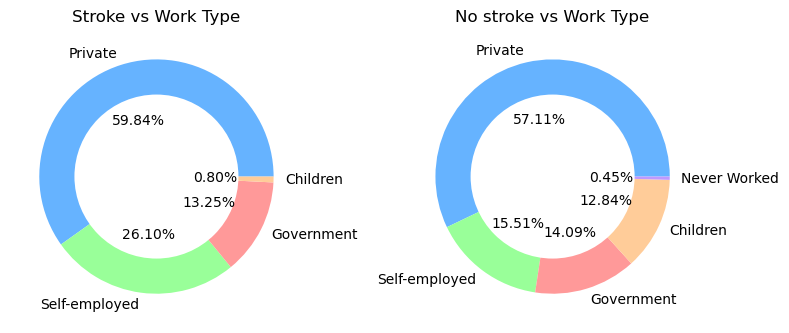

In [165]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Work Type')
piedist(data=df[df['stroke'] == 1], column='work_type', labels=['Private', 'Self-employed', 'Government', 'Children'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Work Type')
piedist(data=df[df['stroke'] == 0], column='work_type', labels=['Private', 'Self-employed', 'Government', 'Children', 
                                                                'Never Worked'])

plt.tight_layout()

##### Residence Type

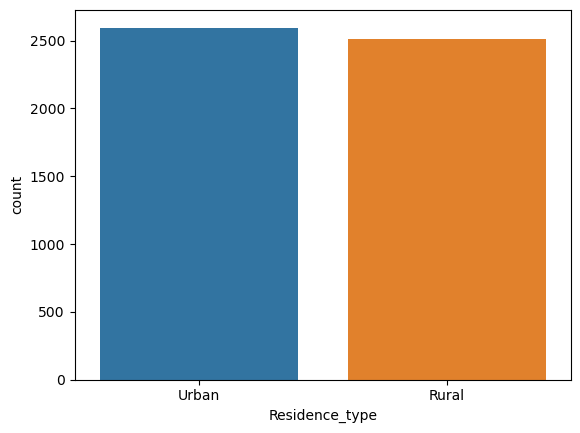

In [171]:
sns.countplot(x=df['Residence_type']);

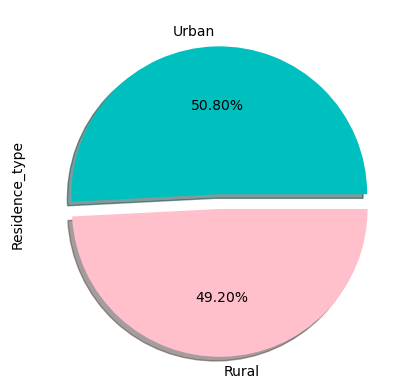

In [170]:
df['Residence_type'].value_counts().plot(kind='pie',autopct='%0.2f%%',shadow=True,explode=[0,0.1],colors=['c','pink'])
plt.show()

People are evenly distributed between rural and urban residence.

###### How does residence type relate to stroke?

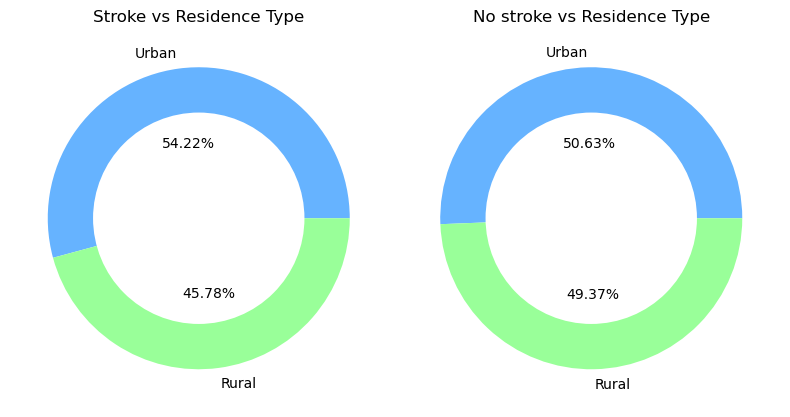

In [172]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Residence Type')
piedist(data=df[df['stroke'] == 1], column='Residence_type', labels=['Urban', 'Rural'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Residence Type')
piedist(data=df[df['stroke'] == 0], column='Residence_type', labels=['Urban', 'Rural'])

plt.tight_layout()

Urban residents are slightly more likely to have stroke than rural residents.

##### Average Glucose Level

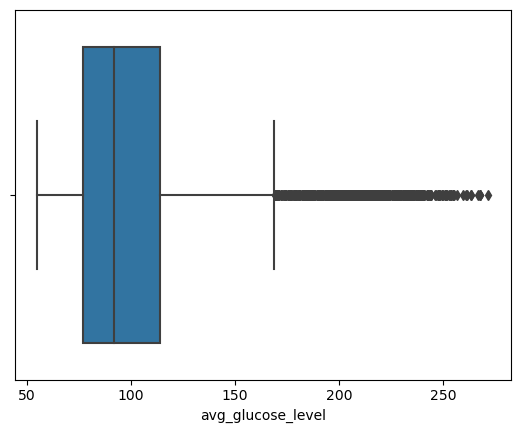

In [173]:
sns.boxplot(x=df['avg_glucose_level'])
plt.show()

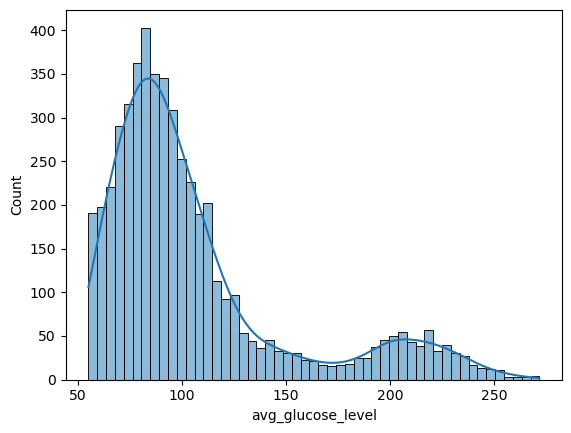

In [181]:
sns.histplot(df['avg_glucose_level'], kde=True);

##### How does avg_glucose_level relate to stroke?

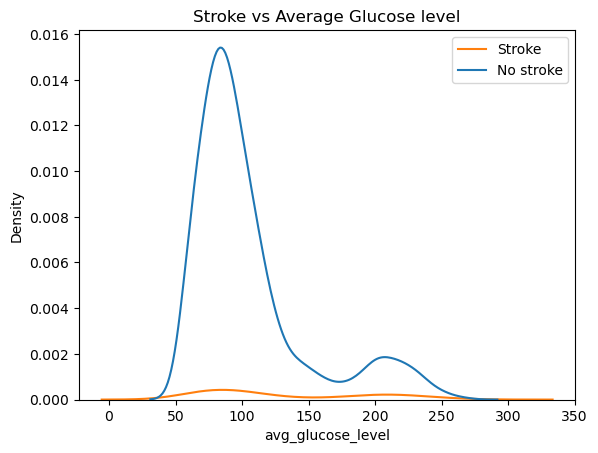

In [178]:
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke')
plt.title('Stroke vs Average Glucose level')
plt.legend(['Stroke', 'No stroke'])
plt.show()

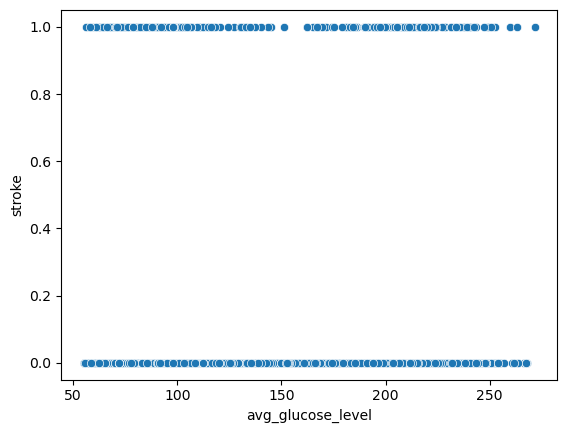

In [176]:
sns.scatterplot(data=df, x='avg_glucose_level', y='stroke')
plt.show()

People with an average glucose level > 100 are more likely yo have stroke.

##### Smoking Status

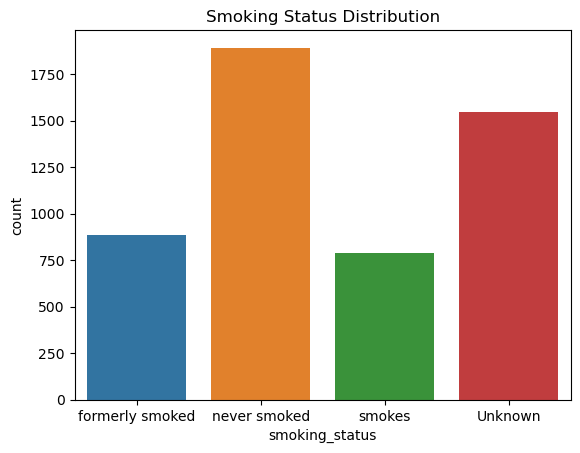

In [182]:
plt.title('Smoking Status Distribution')
sns.countplot(data=df, x='smoking_status');

<AxesSubplot:ylabel='smoking_status'>

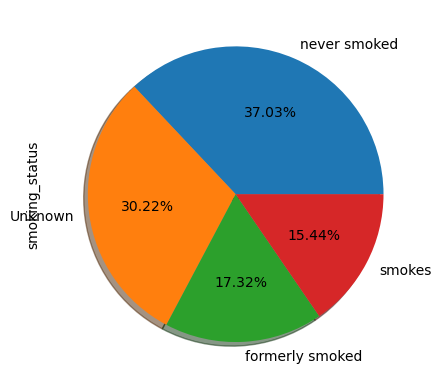

In [186]:
df['smoking_status'].value_counts().plot(kind='pie',autopct='%0.2f%%',shadow=True)

###### How does smoking status relate to stroke?

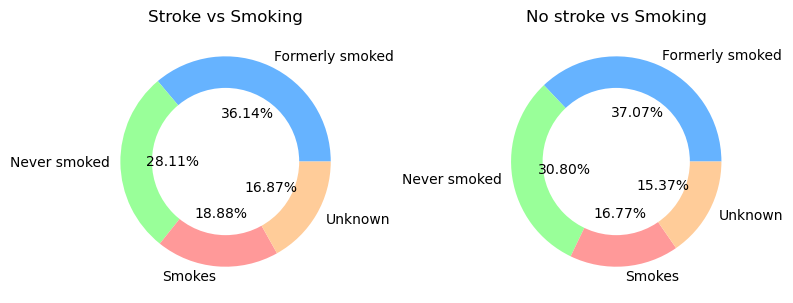

In [187]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Smoking')
piedist(data=df[df['stroke'] == 1], column='smoking_status', labels=['Formerly smoked', 'Never smoked', 'Smokes', 'Unknown'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Smoking')
piedist(data=df[df['stroke'] == 0], column='smoking_status', labels=['Formerly smoked', 'Never smoked', 'Smokes', 'Unknown'])

plt.tight_layout()

### Preprocessing

#### Remove outliers of the dataset

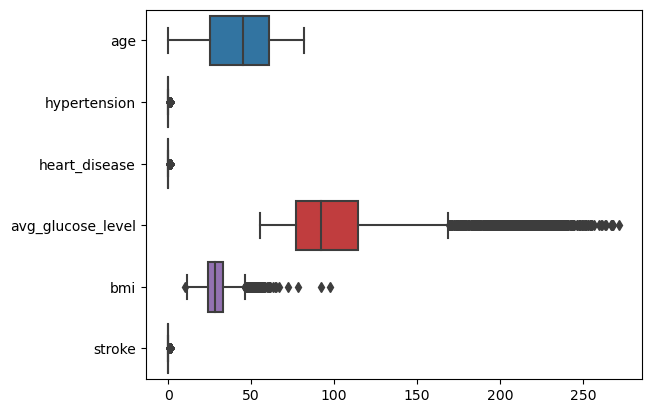

In [110]:
sns.boxplot(data=df,orient='h')
plt.show()

In [14]:
cats = list(df.select_dtypes(include=['object','bool']) )
nums = list(df.select_dtypes(include=['int64','float64']))
print(cats)
print(nums)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


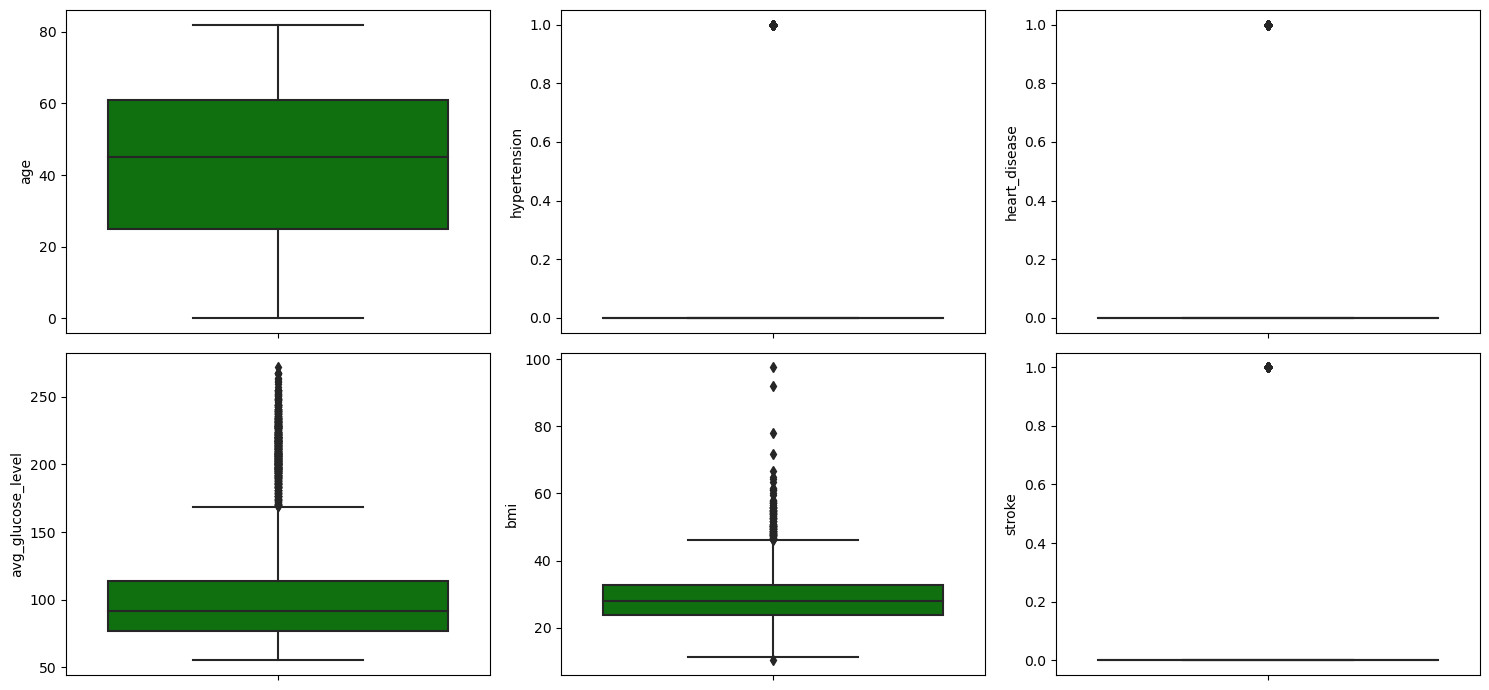

In [15]:
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[nums[i]],color='green',orient='v')
    plt.tight_layout()

In [16]:
def replace_outliers(var1):
    IQR=df[var1].quantile(0.75)-df[var1].quantile(0.25)
    lower_val=df[var1].quantile(0.25)-(IQR*1.5)
    upper_val=df[var1].quantile(0.75)+(IQR*1.5)
    df.loc[df[var1]>=upper_val,var1]=upper_val
    df.loc[df[var1]<=lower_val,var1]=lower_val 
variables=['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
for x in variables:
    replace_outliers(x)

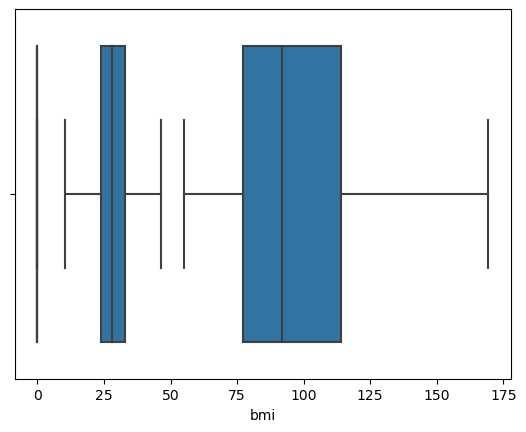

In [17]:
for x in variables:
    sns.boxplot(df[x])

<AxesSubplot:>

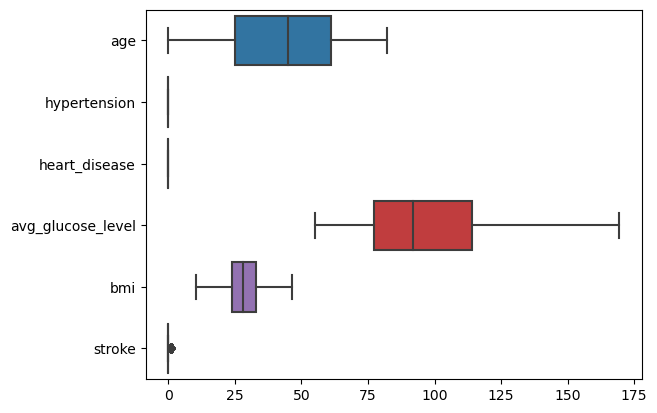

In [18]:
sns.boxplot(data=df,orient='h')

Successfully remove the outlier

#### Encoding the data

In [19]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [20]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [21]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

###### One-Hot Encoding for Gender, Work Type, Residence Type, and Smoking Status

In [23]:
#for gender
df = df.join(pd.get_dummies(df['gender']))
df.drop(columns=['gender'], inplace=True)

In [24]:
#for WorkType
df = df.join(pd.get_dummies(df['work_type']))
df.drop(columns=['work_type'], inplace=True)

In [25]:
df = df.join(pd.get_dummies(df['Residence_type']))
df.drop(columns=['Residence_type'], inplace=True)

In [26]:
df = df.join(pd.get_dummies(df['smoking_status']))
df.drop(columns=['smoking_status'], inplace=True)

###### Mapping to Ever Married Column

In [27]:
df["ever_married"] = df["ever_married"].map({"No": 0, "Yes": 1}).astype(int)

In [28]:
df.dtypes

age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
avg_glucose_level    float64
bmi                  float64
stroke                 int64
Female                 uint8
Male                   uint8
Other                  uint8
Govt_job               uint8
Never_worked           uint8
Private                uint8
Self-employed          uint8
children               uint8
Rural                  uint8
Urban                  uint8
Unknown                uint8
formerly smoked        uint8
never smoked           uint8
smokes                 uint8
dtype: object

In [29]:
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Female,Male,Other,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,0,1,169.3575,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,1,169.3575,28.1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,0,1,105.9200,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,1,169.3575,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,0,0,1,169.3575,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


#### Separate Features and Label

In [30]:
X = df.drop(columns=['stroke'])
Y = df['stroke']

#### Over-Sample using SMOTE
Use SMOTE to handle over-sampling as stroke is under-represented in the dataset.

In [31]:
Y.value_counts() #to check the data is balanced or not #dono same hai toh balanced

0    4861
1     249
Name: stroke, dtype: int64

In [32]:
Y.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [33]:
# using SMOTE Techniqe
sm = SMOTE(random_state=45)
X , Y = sm.fit_resample(X,Y)

In [34]:
from collections import Counter

In [35]:
Counter(Y)

Counter({1: 4861, 0: 4861})

In [36]:
from sklearn.preprocessing import Normalizer
stdand=Normalizer() #minmaxscaler is same as normalizer all the value are between 0 to 1

In [37]:
X=pd.DataFrame(stdand.fit_transform(X),columns=X.columns)
X.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,0.360635,0.0,0.0,0.005383,0.911585,0.197003,0.000000,0.005383,0.0,0.0,0.0,0.005383,0.000000,0.0,0.000000,0.005383,0.0,0.005383,0.000000,0.000000
1,0.334793,0.0,0.0,0.005488,0.929504,0.154224,0.005488,0.000000,0.0,0.0,0.0,0.000000,0.005488,0.0,0.005488,0.000000,0.0,0.000000,0.005488,0.000000
2,0.585326,0.0,0.0,0.007317,0.774972,0.237789,0.000000,0.007317,0.0,0.0,0.0,0.007317,0.000000,0.0,0.007317,0.000000,0.0,0.000000,0.007317,0.000000
3,0.272764,0.0,0.0,0.005567,0.942749,0.191492,0.005567,0.000000,0.0,0.0,0.0,0.005567,0.000000,0.0,0.000000,0.005567,0.0,0.000000,0.000000,0.005567
4,0.419265,0.0,0.0,0.005307,0.898806,0.127372,0.005307,0.000000,0.0,0.0,0.0,0.000000,0.005307,0.0,0.005307,0.000000,0.0,0.000000,0.005307,0.000000


#### Split train data and test data

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,random_state= 42, test_size= 0.3,stratify= Y)

## 1. Modeling

#### 1.1 LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
LRS=LogisticRegression()
Grid_param={'penalty':['l1','l2','elasticnet']}#elastinet is another type of penalty

In [40]:
grid_search=GridSearchCV(LRS,Grid_param,n_jobs=-1,scoring='accuracy')

l1  and l2 are ridge and lasso resp. it is extension of logistic regression, their are some assumption are make while doing 
logistic regression and their are some issue and to solve this isues we use l1 and l2

Grid Search is a technique for finding the optimalparameters from a given set of parameters in a grid.
The model along with the parameters must be entered and extract the best parameters values and then predictions are  made

In [41]:
grid_search.fit(X,Y)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [42]:
grid_search.best_params_

{'penalty': 'l2'}

In [43]:
LR=LogisticRegression(penalty='l2')

In [44]:
LR.fit(X_train,Y_train)#fit is nothing but the training the data

LogisticRegression()

#### Accuracy of Train Model

In [45]:
pred1=LR.predict(X_train)
result1=accuracy_score(pred1,Y_train)
print(result1)

0.7265246142542249


#### Accuracy Of Test Model

In [46]:
pred2=LR.predict(X_test)
result2=accuracy_score(pred2,Y_test)
print(result2)

0.7305450805622214


##### HeatMap Of Y Train

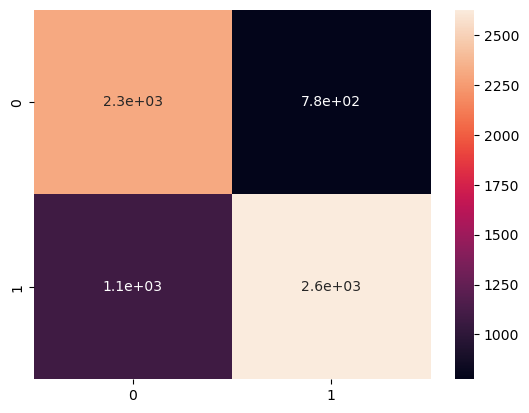

In [47]:
C=confusion_matrix(pred1,Y_train)
sns.heatmap(C, annot=True);

##### HeatMap Of Y Test

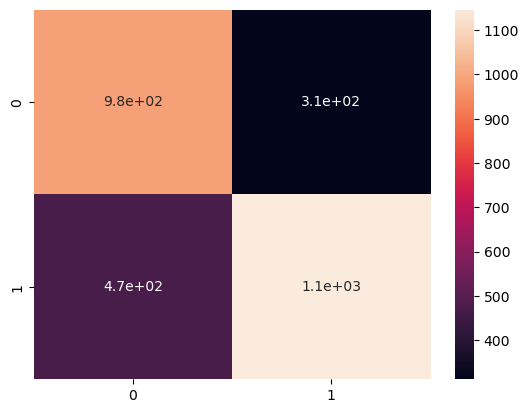

In [48]:
C=confusion_matrix(pred2,Y_test)
sns.heatmap(C, annot=True);

#### Roc Curve of Train Model

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.

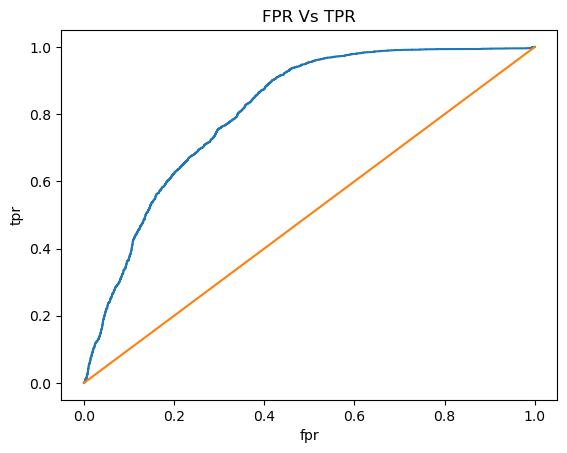

In [232]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
Y_pred_proba=LR.predict_proba(X_train)[:,1]
fpr,tpr,thr=roc_curve(Y_train,Y_pred_proba)
plt.plot(fpr,tpr,label='LRS')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('FPR Vs TPR')
plt.plot([0,1],[0,1])
plt.show()

#### Roc Curve of Test Model

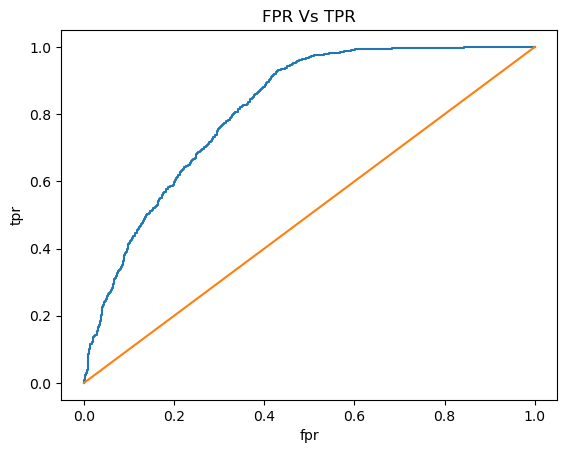

In [233]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
Y_pred_proba1=LR.predict_proba(X_test)[:,1]
fpr,tpr,thr=roc_curve(Y_test,Y_pred_proba1)
plt.plot(fpr,tpr,label='LRS')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('FPR Vs TPR')
plt.plot([0,1],[0,1])
plt.show()

#### 1.2 Using K-Nearest-Neighbors-Classifier

Machine learning modeling to predict stroke in patients uses the K-Nearest Neighbors Classifier algorithm. This algorithm works based on existing features and similarities between these features to classify targets.

In [51]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
import numpy as np

In [52]:
# set hyperparameter
grid_param={'n_neighbors':np.arange(2,50,3),
           'weights':['uniform'],
           'metric':['minkowski','eculidean','manhattan','hamming']
           }

In [53]:
# Create simple model
knn=KNeighborsClassifier()
grid1=GridSearchCV(knn,grid_param,verbose=1,cv=10,n_jobs=-1)
grid1

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'eculidean', 'manhattan',
                                    'hamming'],
                         'n_neighbors': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47]),
                         'weights': ['uniform']},
             verbose=1)

In [54]:
Grid_result=grid1.fit(X_train,Y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [55]:
Grid_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}

#### Evalution Metrix


In [56]:
#It is use to check how model is performing
#Use at the end of the procedure

In [57]:
knn=KNeighborsClassifier(n_neighbors=2,metric='manhattan',weights='uniform')
knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

#### Accuracy Score on testing data

In [58]:
pred1=knn.predict(X_test)

In [59]:
result1=accuracy_score(pred1,Y_test)
print(f'The accuracy score is  {result1}') 

The accuracy score is  0.9372643126499829


#### Accuracy Score on training data

In [60]:
pred2=knn.predict(X_train)
result2=accuracy_score(pred2,Y_train)
print(f'The accuracy score is  {result2}') 

The accuracy score is  0.991182953710507


###### Confusion Matrix

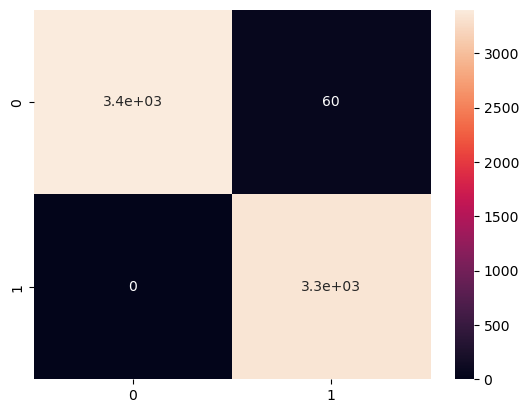

In [61]:
#It plot a table of all the predicted and actual values
from sklearn.metrics import confusion_matrix
C=confusion_matrix(pred2,Y_train)
sns.heatmap(C,annot=True);

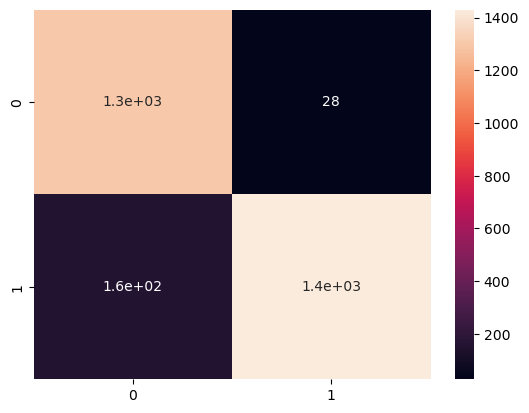

In [62]:
Ca=confusion_matrix(pred1,Y_test)
sns.heatmap(Ca,annot=True);

##### classification_report of train and test

A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

In [63]:
from sklearn.metrics import classification_report
print(classification_report(pred1,Y_test))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1332
           1       0.98      0.90      0.94      1585

    accuracy                           0.94      2917
   macro avg       0.94      0.94      0.94      2917
weighted avg       0.94      0.94      0.94      2917



In [64]:
from sklearn.metrics import classification_report
print(classification_report(pred2,Y_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3462
           1       0.98      1.00      0.99      3343

    accuracy                           0.99      6805
   macro avg       0.99      0.99      0.99      6805
weighted avg       0.99      0.99      0.99      6805



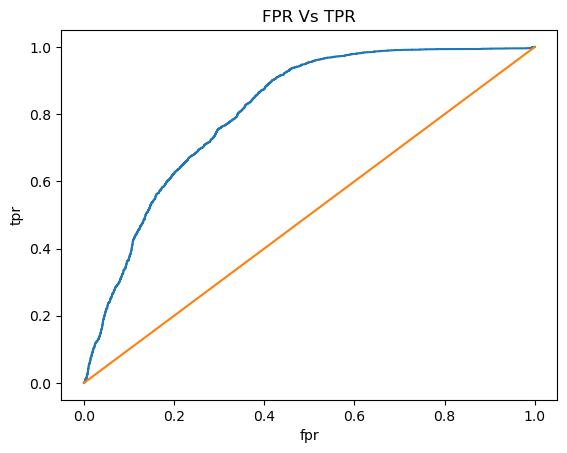

In [234]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
Y_pred_proba=LR.predict_proba(X_train)[:,1]
fpr,tpr,thr=roc_curve(Y_train,Y_pred_proba)
plt.plot(fpr,tpr,label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('FPR Vs TPR')
plt.plot([0,1],[0,1])
plt.show()

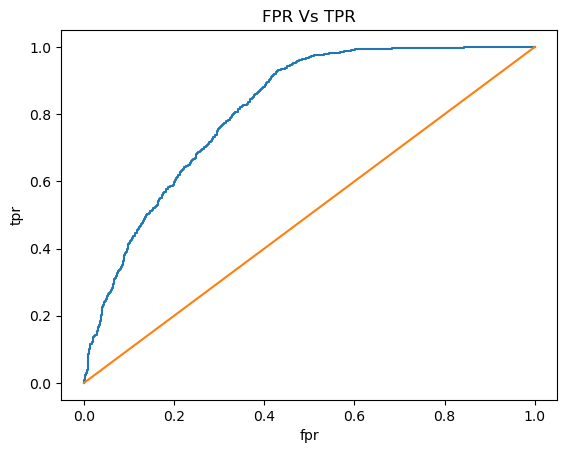

In [235]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
Y_pred_proba=LR.predict_proba(X_test)[:,1]
fpr,tpr,thr=roc_curve(Y_test,Y_pred_proba)
plt.plot(fpr,tpr,label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('FPR Vs TPR')
plt.plot([0,1],[0,1])
plt.show()

## 1.3 Random Forest Classifier Model

In [218]:
from sklearn.ensemble import RandomForestClassifier
#create a model
RF=RandomForestClassifier()

In [219]:
# set hyperparameter
parameters={
    'max_depth':[2,4,6],#range
    'min_samples_leaf':[1,2,3],
    'max_features':['auto','log2','sqrt','none'],#range
    'max_leaf_nodes':[10,20],
    'n_estimators':range(1,19)
}

In [220]:
skf=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)
tuning_model=GridSearchCV(RF,param_grid=parameters,scoring='neg_mean_squared_error',cv=skf,n_jobs=-1)

In [221]:
tuning_model.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'log2', 'sqrt', 'none'],
                         'max_leaf_nodes': [10, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': range(1, 19)},
             scoring='neg_mean_squared_error')

In [222]:
tuning_model.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2,
 'n_estimators': 16}

In [224]:
RF =  RandomForestClassifier(max_depth=6,max_features='log2',max_leaf_nodes=20,min_samples_leaf=2,n_estimators=16)

In [225]:
RF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=20,
                       min_samples_leaf=2, n_estimators=16)

##### Accuracy Score on training data

In [226]:
pred1=RF.predict(X_train)
result1=accuracy_score(pred1,Y_train)
print(result1)

0.9163850110213079


##### Accuracy Score on testing data

In [227]:
pred2=RF.predict(X_test)
result2=accuracy_score(pred2,Y_test)
print(result2)

0.9214946863215633


##### Confusion metric of train and test

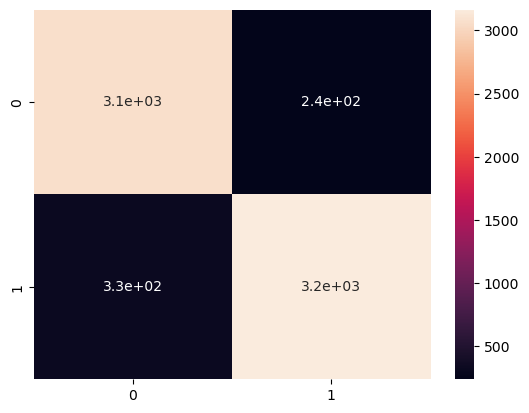

In [237]:
C= confusion_matrix(pred1,Y_train)
sns.heatmap(C,annot=True);

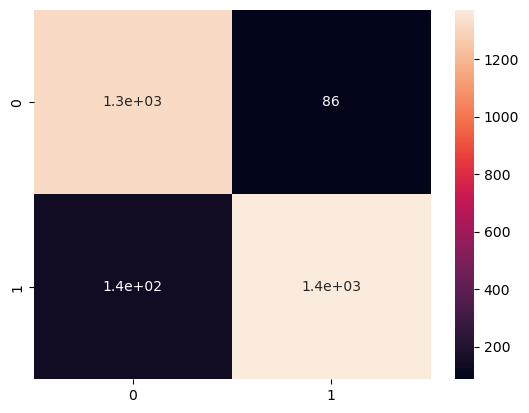

In [238]:
C= confusion_matrix(pred2,Y_test)
sns.heatmap(C,annot=True);

##### Roc Curve of train and test

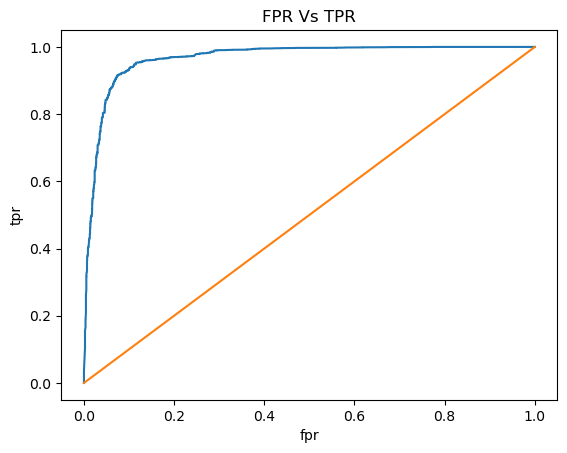

In [236]:
from sklearn.metrics import roc_curve
Y_pred_proba = RF.predict_proba(X_train)[:,1]
frp,tpr,thresholds = roc_curve(Y_train,Y_pred_proba)
plt.plot(frp,tpr,label='RF')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('FPR Vs TPR')
plt.plot([0,1],[0,1])
plt.show()

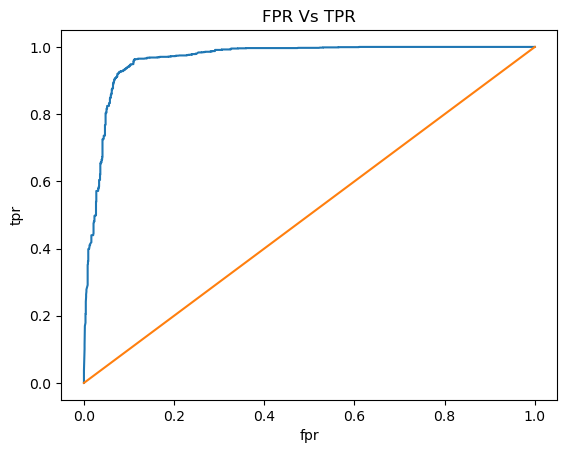

In [239]:
from sklearn.metrics import roc_curve
Y_pred_proba = RF.predict_proba(X_test)[:,1]
frp,tpr,thresholds = roc_curve(Y_test,Y_pred_proba)
plt.plot(frp,tpr,label='RF')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('FPR Vs TPR')
plt.plot([0,1],[0,1])
plt.show()

### 1.4 Decision Tree Classifier

In [204]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [205]:
param_grid={
    'max_depth':[2,4,6,8],#range
    'max_features':[0.5,0.8],#range
    'criterion':['gini','entropy']
}

In [206]:
from sklearn.model_selection import KFold
cv_val=KFold(random_state=42,n_splits=10,shuffle=True)

In [207]:
from sklearn.model_selection import GridSearchCV
gridsearch=GridSearchCV(estimator=DT,param_grid=param_grid,scoring='accuracy',cv=10)

In [208]:
gridsearch.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': [0.5, 0.8]},
             scoring='accuracy')

In [209]:
gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 0.8}

In [210]:
DTR=DecisionTreeClassifier(random_state=42,max_depth=8,max_features=0.8,criterion='entropy')

In [211]:
DTR.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=0.8,
                       random_state=42)

##### Training Accuracy Score

In [212]:
predicts1=DTR.predict(X_train)
result1=accuracy_score(predicts1,Y_train)
print(f'The training accuracy score is  {result1}')

The training accuracy score is  0.9163850110213079


##### Testing Accuracy Score

In [213]:
predicts1=DTR.predict(X_test)
result1=accuracy_score(predicts1,Y_test)
print(f'The testing accuracy score is  {result1}')

The testing accuracy score is  0.908467603702434


##### HeatMap of Train and Test Model

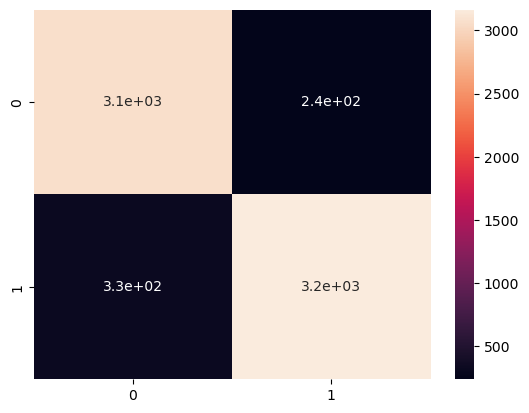

In [228]:
C= confusion_matrix(pred1,Y_train)
sns.heatmap(C,annot=True);

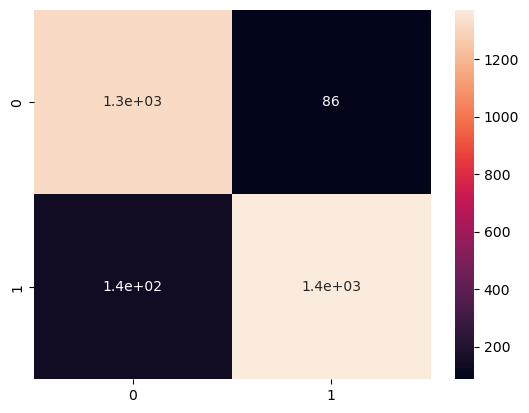

In [229]:
C= confusion_matrix(pred2,Y_test)
sns.heatmap(C,annot=True);

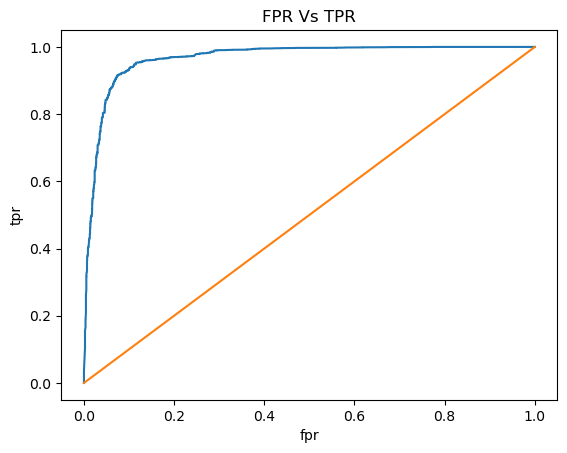

In [240]:
#Roc Curve of train and test
from sklearn.metrics import roc_curve
Y_pred_proba = RF.predict_proba(X_train)[:,1]
frp,tpr,thresholds = roc_curve(Y_train,Y_pred_proba)
plt.plot(frp,tpr,label='DT')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('FPR Vs TPR')
plt.plot([0,1],[0,1])
plt.show()

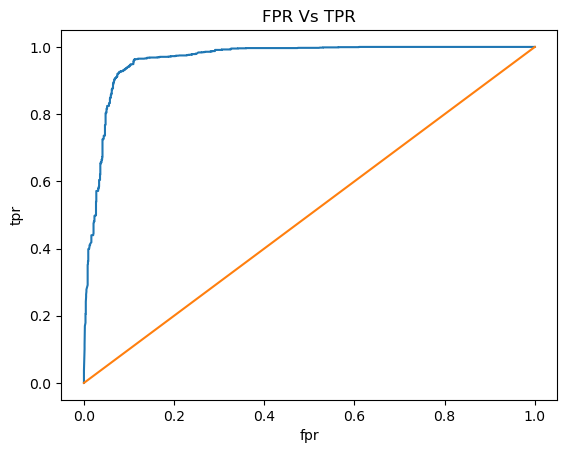

In [241]:
from sklearn.metrics import roc_curve
Y_pred_proba = RF.predict_proba(X_test)[:,1]
frp,tpr,thresholds = roc_curve(Y_test,Y_pred_proba)
plt.plot(frp,tpr,label='DT')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('FPR Vs TPR')
plt.plot([0,1],[0,1])
plt.show()

## 1.5 XGBOOST Classifier

Develop the Machine Learning model with Hyperparameter Tuning HalvingGridSearchCV

In [244]:
from xgboost import XGBClassifier

In [245]:
xgb = XGBClassifier()

In [246]:
# set hyperparameter
param_grid = {'n_neighbors': [1, 2],
              'p': [1, 2],
              'weights': ["uniform","distance"],
              'algorithm':["ball_tree", "kd_tree", "brute"],
              }

In [247]:
# Seek for the best hyperparameter with HalvingGridSearchCV
new_param = HalvingGridSearchCV(knn, 
                                param_grid, 
                                cv=StratifiedKFold(n_splits=3, random_state= 123, shuffle=True),
                                resource='leaf_size',
                                max_resources=20,
                                scoring='recall',
                                aggressive_elimination=False).fit(X_train, Y_train)

In [248]:
# Result of the hyperparameter tuning
print(f"Best Hyperparameter {new_param.best_estimator_} with score {new_param.best_score_}")

Best Hyperparameter KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='manhattan',
                     n_neighbors=1, p=1, weights='distance') with score 0.9753164114397594


In [249]:
# Set the model with the best hyperparameter
model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1, weights='distance')
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1,
                     weights='distance')

In [250]:
# Test tuned model with test data
y_pred = model.predict(X_test)

In [251]:
# Tuned model report
acc = accuracy_score(Y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(Y_train,model.predict(X_train)))

Testing-set Accuracy score is: 0.9221803222488858
Training-set Accuracy score is: 1.0


#### Classification Report

In [252]:
improvement_report = classification_report(Y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(improvement_report).transpose()

,precision,recall,f1-score,support
No Stroke,0.989666,0.853324,0.916452,1459.00000
Stroke,0.871007,0.991084,0.927174,1458.00000
accuracy,0.922180,0.922180,0.922180,0.92218
macro avg,0.930336,0.922204,0.921813,2917.00000
weighted avg,0.930357,0.922180,0.921811,2917.00000


#### Accuracy Score Of the Test Model

#### EDA Report

### Closing
Machine Learning Model to predict stroke in humans can be used because it reaches a recall score of 90.64% which is where this model can predict stroke very well although it still needs to be improved even up to a recall score of 100%.

So hence, we observe that XGBoost gives the highest accuracy of 90.64%, followed by Decision Tree with 89.06% ,KNN Classifier with 92.67% same as that Random Forest and Rest have given an accuracy of <80% i.e Logistic Regression

So,we conclude that the Model work well in Strock Identification